In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
# Merging data from each month into one CSV
files = [file for file in os.listdir('./Sales_Data')]
all_data = pd.DataFrame() # to create an emty data frame
for file in files:     
    df = pd.read_csv('./Sales_Data/'+ file)
    all_data = pd.concat([all_data, df])
    
all_data.to_csv('all_data', index = False)

In [4]:
df = pd.read_csv('all_data')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# checking for missing values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# dropping the missing values
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
# checking for duplicates
df.duplicated().sum()

618

In [9]:
df.size

1117830

In [10]:
# dropping our duplicated columns
df.drop_duplicates(inplace = True )

In [11]:
df.size

1114122

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [14]:
# checking the unique values for Quantity Ordered column
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [15]:
df= df[df['Quantity Ordered'] != 'Quantity Ordered']

In [16]:
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [17]:
df['Quantity Ordered']= df['Quantity Ordered'].astype(int)

In [18]:
df['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [19]:
df['Price Each']= df['Price Each'].astype(float)

In [20]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [21]:
# creating a new column which is our revenue by multiplying the quantity by the price
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [23]:
# creating month, day and hour columns for further analysis
df['month'] =pd.to_datetime(df['Order Date']).dt.month
df['day']= pd.to_datetime(df['Order Date']).dt.day
df['hour']= pd.to_datetime(df['Order Date']).dt.hour

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,month,day,hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,19,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,7,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,12,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,12,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,30,9


In [25]:
df['city'] = df['Purchase Address'].str.split(',', expand = True)[1]
df['state'] = df['Purchase Address'].str.split(',', expand = True)[2].str.split(' ',expand = True)[1]
df['Address'] = df['city'] + ' (' + df['state'] + ')'

In [26]:
# dropping unnecesarry columns
df.drop(['Order ID','city','state','Purchase Address','Order Date'], axis = 1 , inplace = True)

In [27]:
df.head()

,Product,Quantity Ordered,Price Each,Revenue,month,day,hour,Address
0,USB-C Charging Cable,2,11.95,23.90,4,19,8,Dallas (TX)
2,Bose SoundSport Headphones,1,99.99,99.99,4,7,22,Boston (MA)
3,Google Phone,1,600.00,600.00,4,12,14,Los Angeles (CA)
4,Wired Headphones,1,11.99,11.99,4,12,14,Los Angeles (CA)
5,Wired Headphones,1,11.99,11.99,4,30,9,Los Angeles (CA)


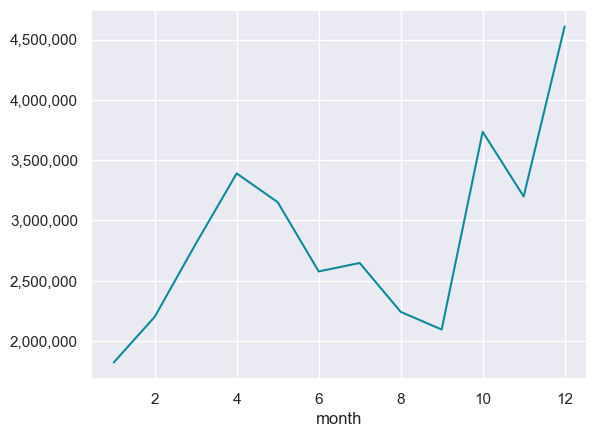

In [28]:
#  december is the month with the highest revenue with a net revenue of 460,829,5.70
df.groupby('month')['Revenue'].sum().plot(kind = 'line',
                                          color = '#108A99').yaxis.set_major_formatter('{x:,.0f}')


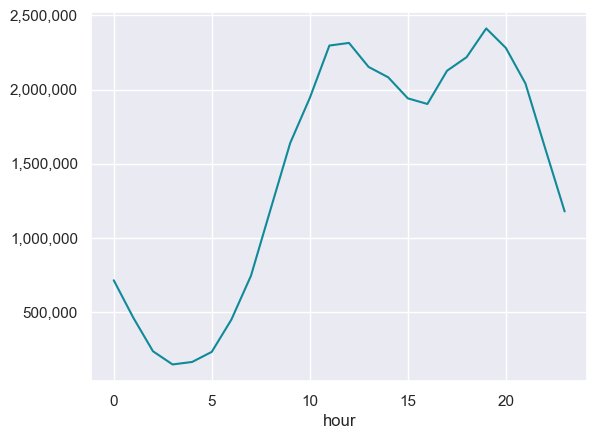

In [29]:
# 19 pm has the most generated Revenue with a number of 241,197 $
# so people are most active in this hour and placing orders 
# so i recommend if we increase our advertisements at this hour 
df.groupby('hour')['Revenue'].sum().plot(kind ='line',
                                         color = '#108A99').yaxis.set_major_formatter('{x:,.0f}')

<Axes: xlabel='Address', ylabel='Quantity Ordered'>

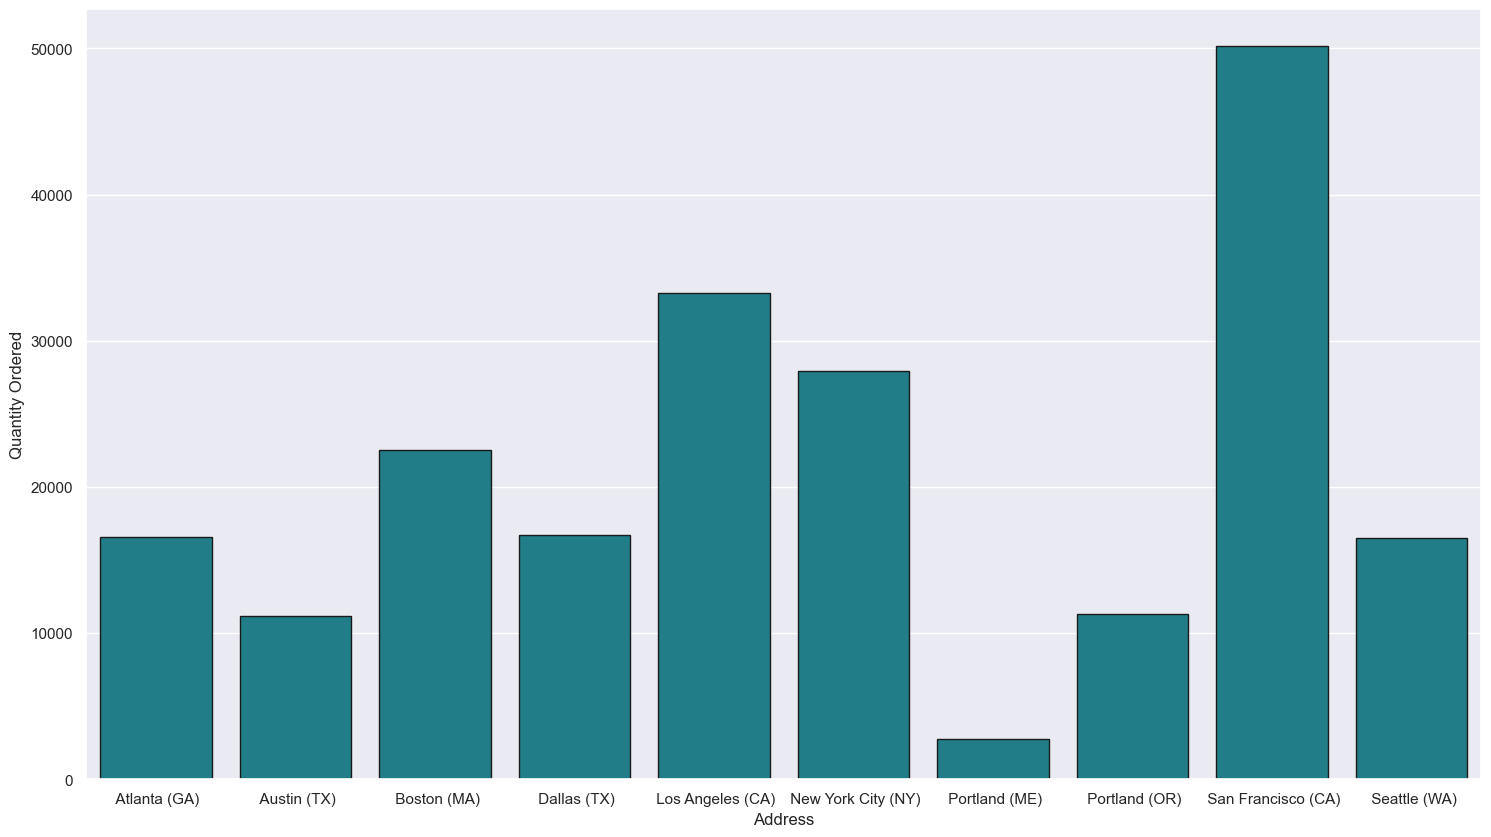

In [30]:
# San francisco (CA) has the most quantity ordered with a number of 50,169 orders
plt.figure(figsize =(18,10))
sns.barplot(x = df.groupby('Address')['Quantity Ordered'].sum().index
            , y = df.groupby('Address')['Quantity Ordered'].sum(),
           data =df, color = '#108A99', edgecolor = 'k')


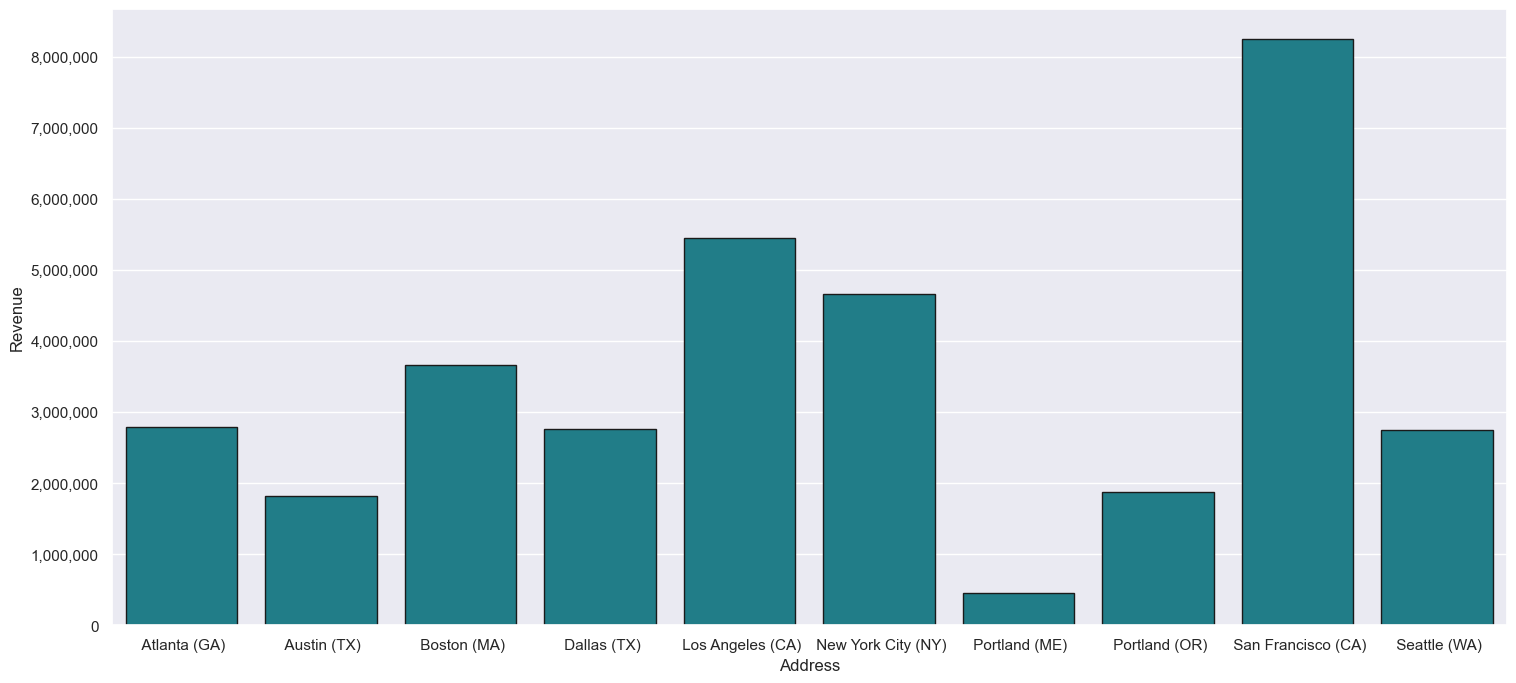

In [36]:
# San francisco (CA) has the most generated revenue with a number of 82,547,43.55 $
plt.figure(figsize =(18,8))
sns.barplot(x = df.groupby('Address')['Revenue'].sum().index
            , y = df.groupby('Address')['Revenue'].sum(),
           data =df, color = '#108A99', edgecolor = 'k').yaxis.set_major_formatter('{x:,.0f}')


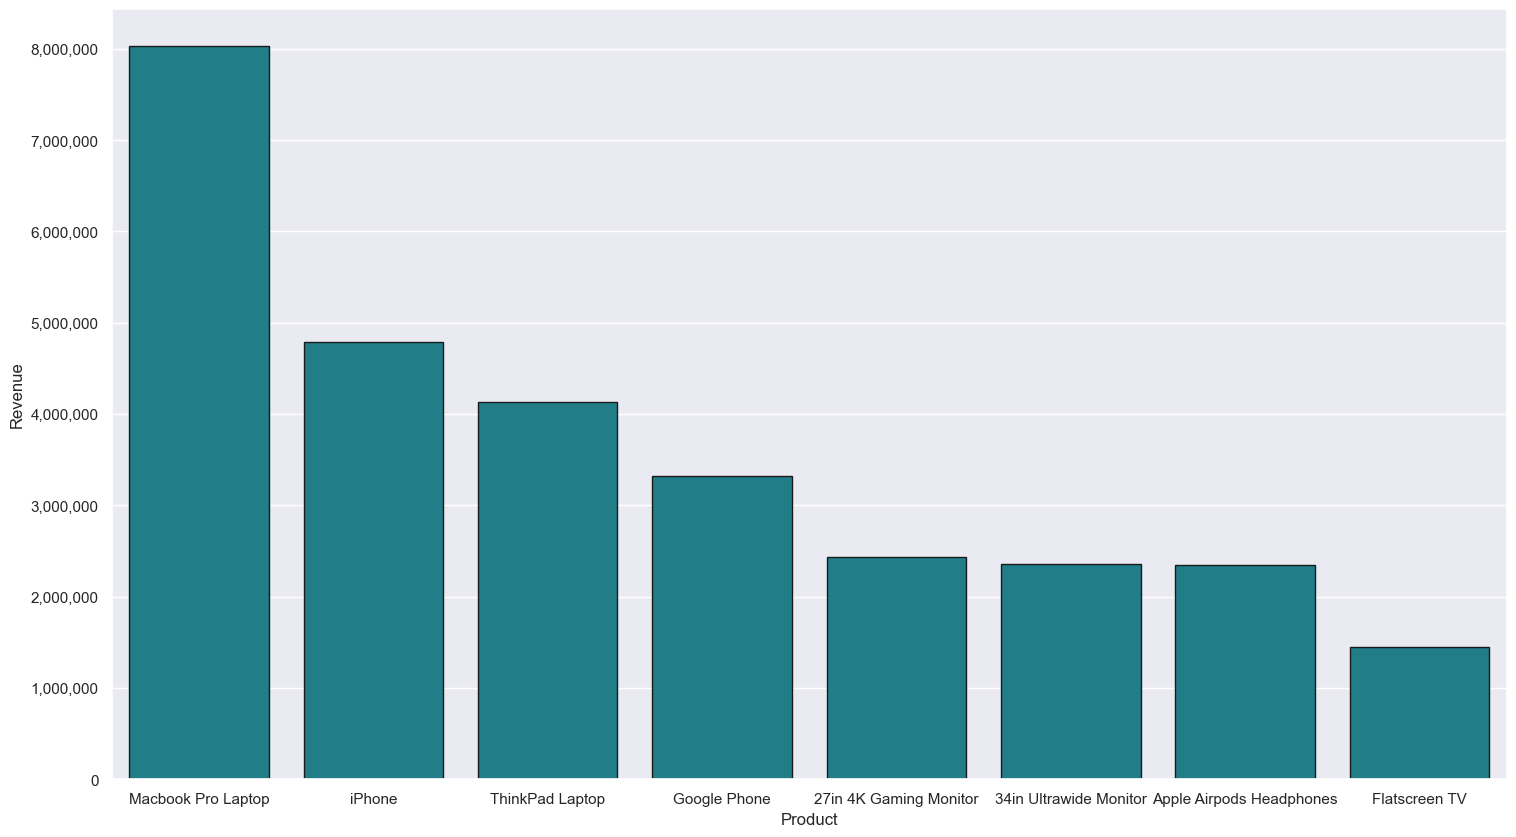

In [32]:
# Macbook bro laptop has the most revenue margins 
plt.figure(figsize =(18,10))
sns.barplot(x = df.groupby('Product')['Revenue'].sum().sort_values(ascending = False)[:8].index
            , y = df.groupby('Product')['Revenue'].sum().sort_values(ascending = False)[:8],
           data =df, color = '#108A99', edgecolor = 'k').yaxis.set_major_formatter('{x:,.0f}')


In [33]:
df.head()

,Product,Quantity Ordered,Price Each,Revenue,month,day,hour,Address
0,USB-C Charging Cable,2,11.95,23.90,4,19,8,Dallas (TX)
2,Bose SoundSport Headphones,1,99.99,99.99,4,7,22,Boston (MA)
3,Google Phone,1,600.00,600.00,4,12,14,Los Angeles (CA)
4,Wired Headphones,1,11.99,11.99,4,12,14,Los Angeles (CA)
5,Wired Headphones,1,11.99,11.99,4,30,9,Los Angeles (CA)


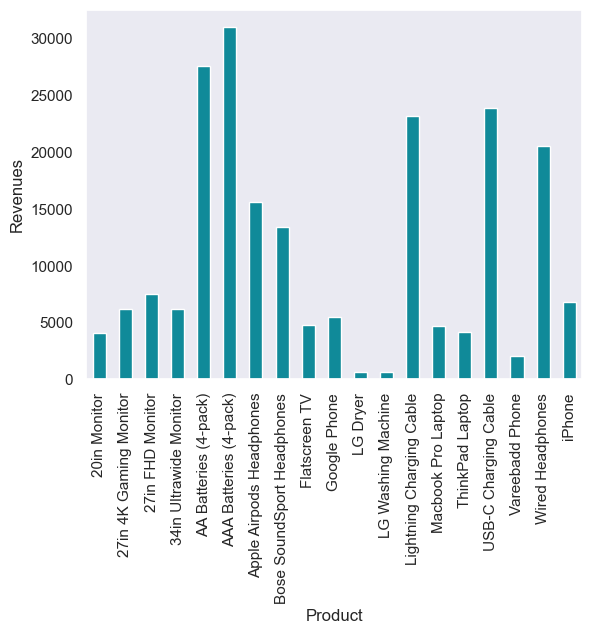

In [42]:
df.groupby('Product')['Quantity Ordered'].sum().plot(kind = 'bar',  color = '#108A99')
plt.ylabel('Revenues')
plt.grid()

<Axes: xlabel='Product', ylabel='Quantity Ordered'>

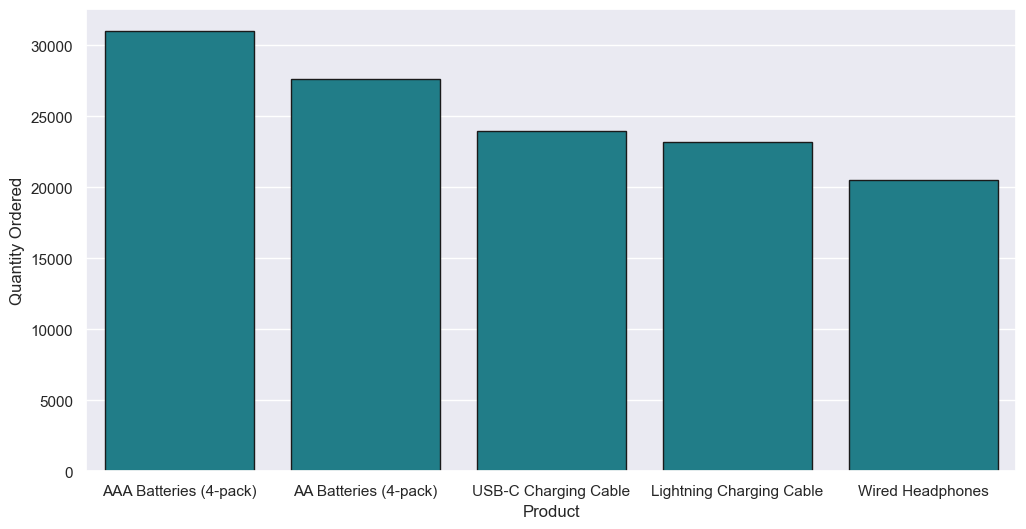

In [176]:
# displaying the top 5 sold products
# AAA Batteries (4-pack) is the most ordered product with a number of 30,986
plt.figure(figsize =(12,6))
sns.barplot(x = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False)[:5].index,
y = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False)[:5], data = df,
            color = '#108A99', edgecolor = 'k')

In [179]:
# AAA Batteries (4-pack) has the lowest price per unit (2.99) that's why it has the most quantity sold.
df.groupby(['Product', 'Price Each'])['Quantity Ordered'].sum().sort_values(ascending = False)

Product                     Price Each
AAA Batteries (4-pack)      2.99          30986
AA Batteries (4-pack)       3.84          27615
USB-C Charging Cable        11.95         23931
Lightning Charging Cable    14.95         23169
Wired Headphones            11.99         20524
Apple Airpods Headphones    150.00        15637
Bose SoundSport Headphones  99.99         13430
27in FHD Monitor            149.99         7541
iPhone                      700.00         6847
27in 4K Gaming Monitor      389.99         6239
34in Ultrawide Monitor      379.99         6192
Google Phone                600.00         5529
Flatscreen TV               300.00         4813
Macbook Pro Laptop          1700.00        4725
ThinkPad Laptop             999.99         4128
20in Monitor                109.99         4126
Vareebadd Phone             400.00         2068
LG Washing Machine          600.00          666
LG Dryer                    600.00          646
Name: Quantity Ordered, dtype: int32